In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing Data set

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
df.shape

(158, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
#Checking for NULL values.

In [12]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [13]:
#As there is no missing values (NaN)(VALUES IN DATA SET WE CAN PROCEED FURTHER)

In [15]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [16]:
df['Dystopia Residual'].value_counts()

2.51738    1
2.51767    1
1.80101    1
1.57059    1
1.24074    1
          ..
2.24729    1
1.61583    1
2.44649    1
2.32407    1
1.56726    1
Name: Dystopia Residual, Length: 158, dtype: int64

In [17]:
df['Happiness Score'].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

In [18]:
df['Economy (GDP per Capita)'].value_counts()

1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name: Economy (GDP per Capita), Length: 158, dtype: int64

In [19]:
#Drop Country and Happiness index since it is unique for each country

In [20]:
df_new = df.drop(["Country","Happiness Rank"],axis=1)

In [21]:
#Countries with highest happiness score

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

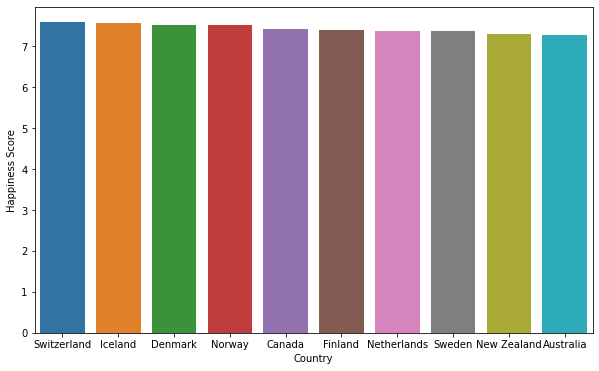

In [24]:
plt.figure(figsize=(10,6))
df_happiest = df.sort_values(by="Happiness Score",ascending=False).iloc[0:10,:]
sns.barplot(x="Country",y="Happiness Score",data=df_happiest)

In [25]:
#Countries with Least happiness score

<AxesSubplot:xlabel='Country', ylabel='Happiness Score'>

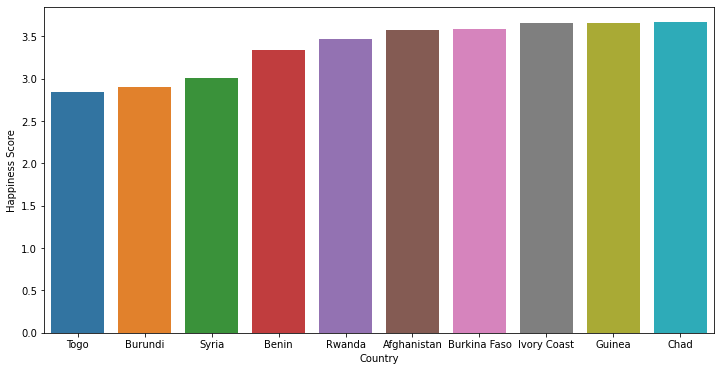

In [26]:
plt.figure(figsize=(12,6))
df_happiest = df.sort_values(by="Happiness Score",ascending=True).iloc[0:10,:]
sns.barplot(x="Country",y="Happiness Score",data=df_happiest)

In [27]:
#Distribution of error in happiness score

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

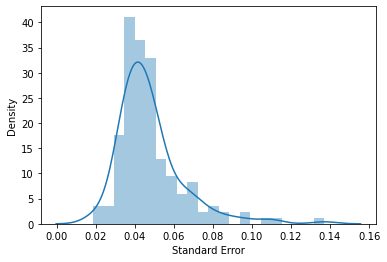

In [28]:
sns.distplot(df_new["Standard Error"])

In [29]:
#Lets compare the relationship between happiness score and different factors

In [30]:
df_new.columns

Index(['Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

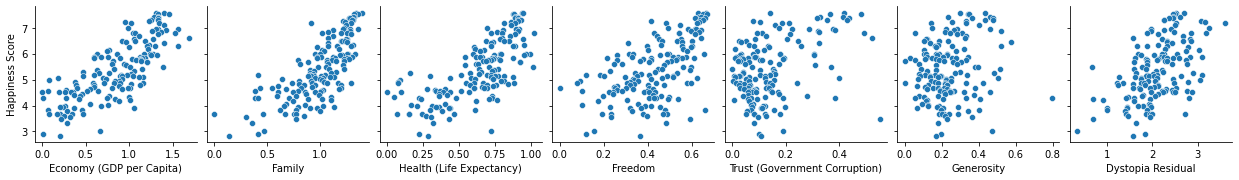

In [31]:
sns.pairplot(data=df_new,y_vars="Happiness Score",x_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'])

In [32]:
#Here we can say that there is astrong relation between happiness score and economy (GDP PER CAPITA INCOME).
# ALSO,
# Family, Health (Life Expectancy)These factors have almost linear relation with happiness score


In [33]:
#Distribution of Happiness Score by Region

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

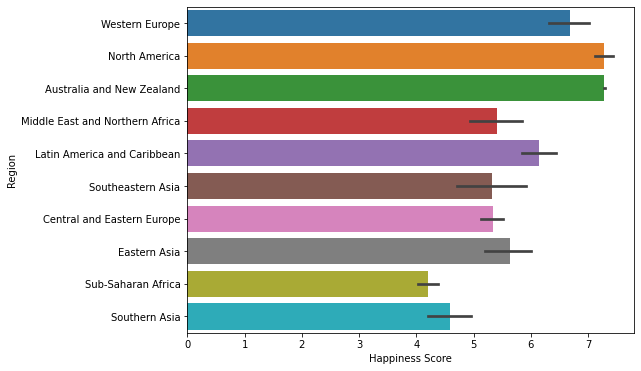

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_new["Happiness Score"],y=df_new["Region"])

In [36]:
#Here we can observe that happiness score is more in western europe and leastin sub sahara africa region.
# now on bassis of,

In [35]:
#Distribution of Freedom by Region

<AxesSubplot:xlabel='Freedom', ylabel='Region'>

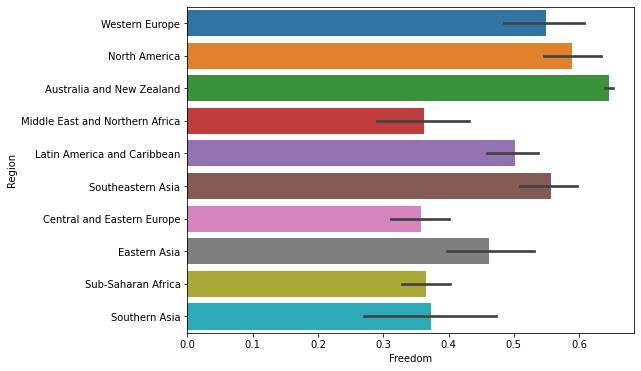

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_new["Freedom"],y=df_new["Region"])

In [ ]:
#correlation of happiness score versus 'Trust (Government Corruption) corruption ratio is an interesting fact

<AxesSubplot:xlabel='Happiness Score', ylabel='Trust (Government Corruption)'>

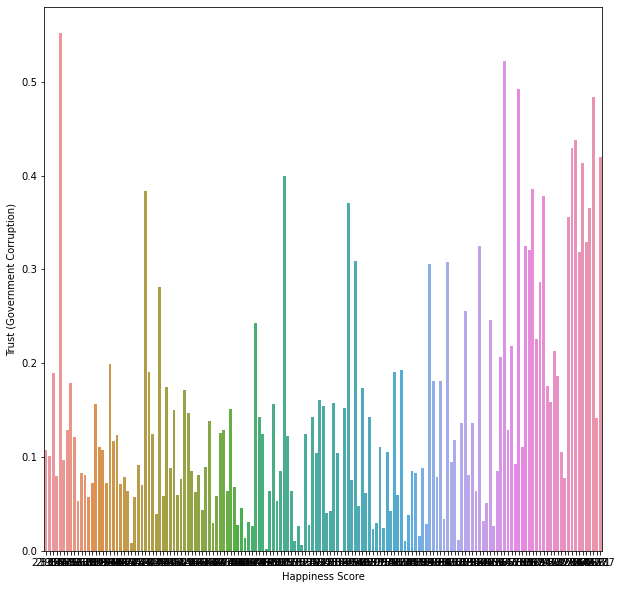

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_new["Happiness Score"],y=df_new["Trust (Government Corruption)"])

In [38]:
# Now converting the values

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.5+ KB


In [40]:
# Now we can do prer-processing of the data for which we have to import some important libraries

In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_new["Region"] = le.fit_transform(df_new["Region"])

In [42]:
X = df_new.drop("Happiness Score",axis=1)
y = df["Happiness Score"]

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# for further analysis we will do linear regression analysiss

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled,y)
reg.score(X_scaled,y)

0.999999943060637

In [47]:
# Here we can observe that our model data seems to be over fitted , so we will do other analysis

<AxesSubplot:>

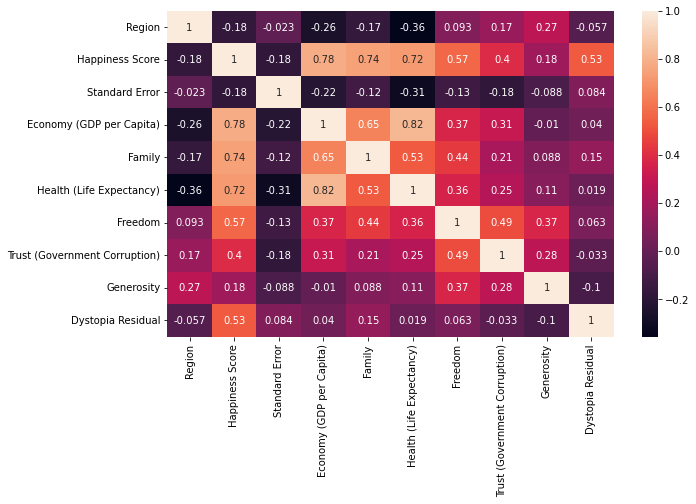

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(),annot=True)

In [50]:
# Now here we see that GDP has more than 80% correlation with health 

In [51]:
X_feature = X.drop("Economy (GDP per Capita)",axis=1)
scaler = StandardScaler()
X_feature = scaler.fit_transform(X_feature)
reg = LinearRegression()
reg.fit(X_feature,y)
reg.score(X_feature,y)

0.9700832186839738

In [52]:
# what was our question?

In [53]:
#You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [54]:
# so from above analysis and predicition through different models we can say that prominently that,

In [ ]:
# Happiness score mainly depends on GDP per Capita, Family, Life Expectancy, Freedom, Generosity.